<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/7-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###최상의 신경망 모델 제작

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

###손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [5]:
model=model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=5,verbose=0) # verbose는 1일 때 에포크마다 진행 막대 함께 손실 등 지표 출력
 # 2일 때는 진행 막대 빼고 출력
 # 0일 때는 그래프로 나타내고 과정 안나타냄

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


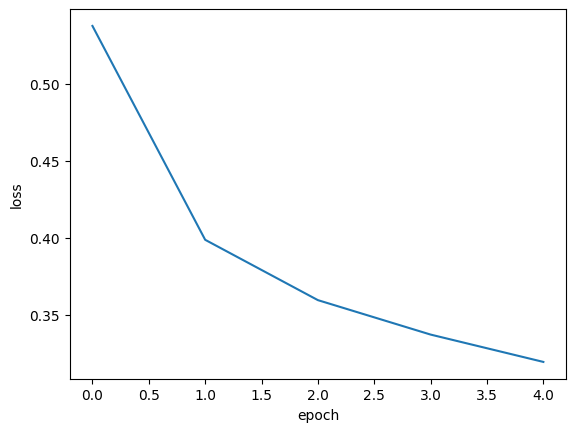

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch') # 에포크
plt.ylabel('loss') # 계산된 손실값
plt.show()

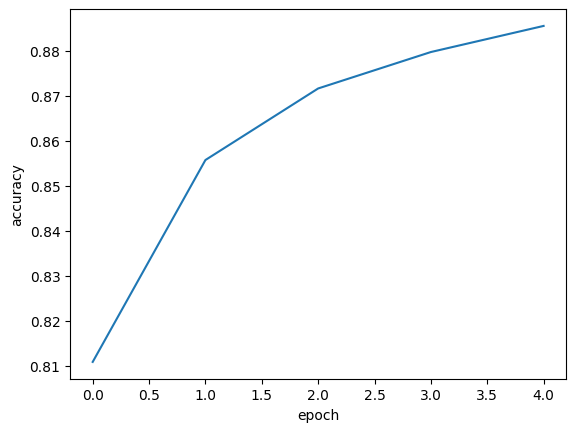

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy') # 정확도
plt.show()

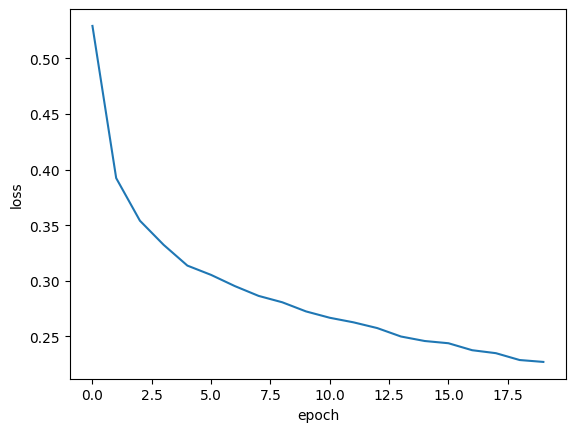

In [11]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###검증 손실

In [12]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=20,verbose=0, 
                    validation_data=(val_scaled,val_target))

In [ ]:
print(history.history.keys())

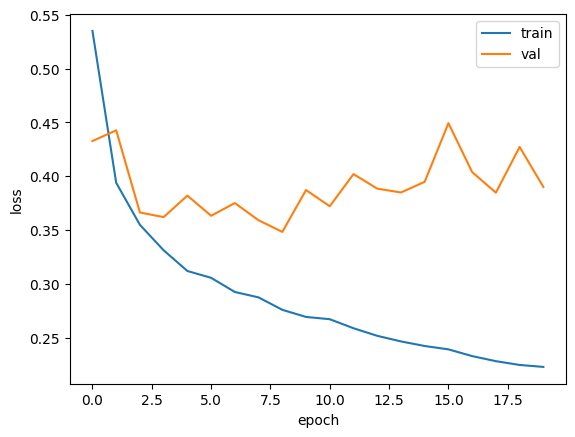

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

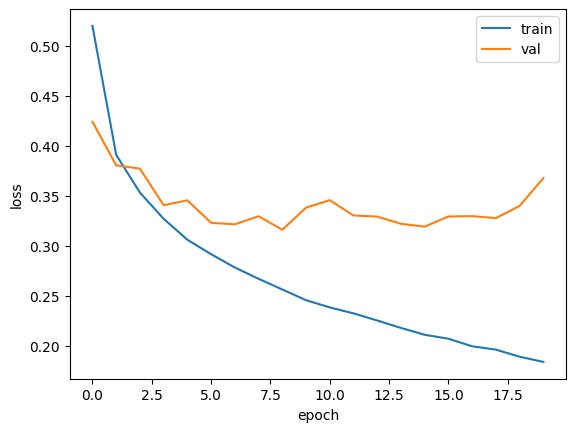

In [15]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=20,verbose=0, 
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###드롭아웃
 * 데이터가 적을 때 사용됨
 * 제프리 힌턴이 만듦
 * 일부 뉴런 랜덤하게 0으로 만들어 과대적합 막음

In [20]:
model=model_fn(keras.layers.Dropout(0.6))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


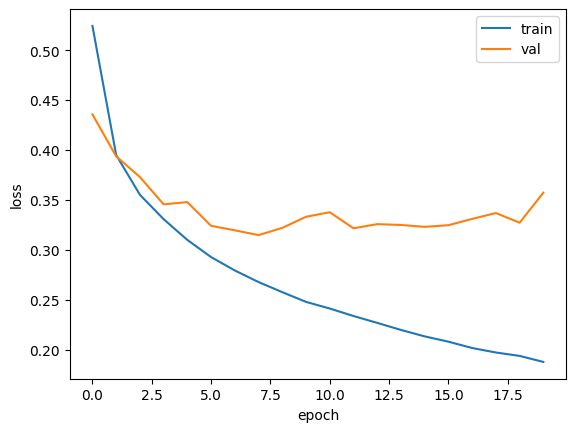

In [21]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=20,verbose=0, 
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [22]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history=model.fit(train_scaled, train_target,epochs=10,verbose=0, 
                    validation_data=(val_scaled,val_target))

###모델 내 마음속에 저장

In [23]:
model.save_weights('model-weights.h5') # HDF5포멧으로 저장

In [24]:
model.save('model-whole.h5')

In [25]:
!ls -al *.h5

-rw-r--r-- 1 root root 332584 Apr  8 17:19 model-weights.h5
-rw-r--r-- 1 root root 980368 Apr  8 17:19 model-whole.h5


In [26]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

###콜백
 * 훈련 도중 작업 수행하게 해주는 객체

In [29]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

In [30]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target) # 검증점수 커지면 과대적합으로 인해 더 훈련할 필요가 없음. 시작되기 전에 훈련 중지 : 조기 종료

375/375 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8832


[0.32099249958992004, 0.8831666707992554]

In [33]:
model=model_fn(keras.layers.Dropout(0.1))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

In [34]:
print(early_stopping_cb.stopped_epoch) # 정지시킨 에포크 번호 출력

10


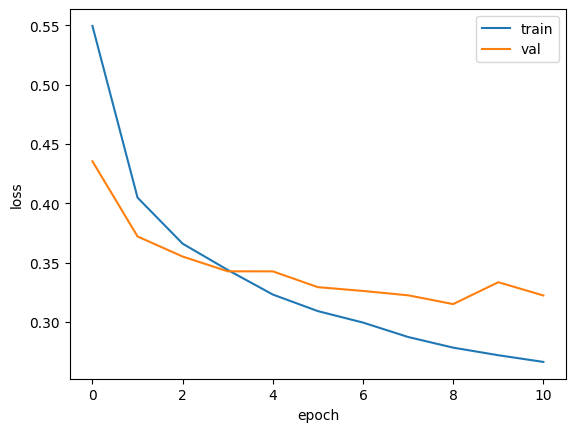

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3150 - accuracy: 0.8861


[0.31500044465065, 0.8860833048820496]